# Decision Trees


## Tasks

### Task 1

Import data you need to solve tasks for this lesson. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Colormap, ListedColormap
import seaborn as sns

In [2]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(
    n_samples=200, n_features=2,
    n_informative=2, n_redundant=0,
    random_state=42
)


data = pd.DataFrame(np.hstack((X, y.reshape(-1, 1))),
                    columns=['x1', 'x2', 'y'])

In [3]:
data.head()

,x1,x2,y
0,1.689767,-1.408241,1.0
1,1.530287,-1.459848,1.0
2,-1.175042,-1.447633,0.0
3,-2.585395,0.963532,0.0
4,1.372246,0.440695,1.0


In [4]:
data.shape

(200, 3)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      200 non-null    float64
 1   x2      200 non-null    float64
 2   y       200 non-null    float64
dtypes: float64(3)
memory usage: 4.8 KB


### Task 2

Check target class balance.

In [6]:
data['y'].value_counts()

1.0    100
0.0    100
Name: y, dtype: int64

### Task 3 

Split data on train and test samples. 

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

### Task 4 

Fit a decision tree classification model and check accuracy. 

In [8]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [9]:
print(f'Train accuracy: {model.score(X_train, y_train):.4}')
print(f'Test accuracy: {model.score(X_test, y_test):.4}')

Train accuracy: 1.0
Test accuracy: 0.8


### Task 5

Render a separating hyperplane for a decision tree classification model. 

In [10]:
def plot_surface(clf, X, y):
    plt.figure(figsize=(16, 10))
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

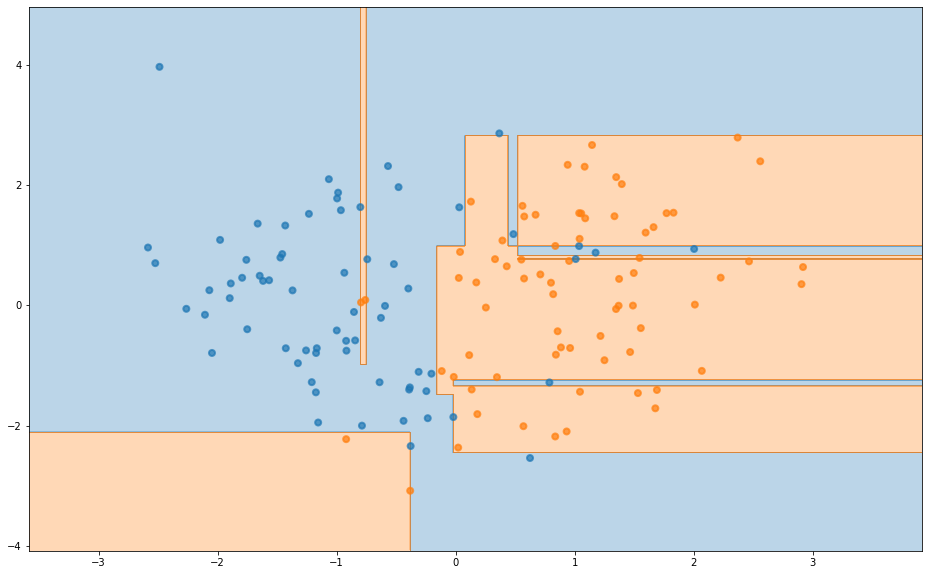

In [11]:
plot_surface(model, X_train, y_train)

### Task 6 

Find `max_depth` and `min_samples_leaf` best parameters on train sample data. 

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                    random_state = 42) 

In [13]:
max_depth_set = [6, 7, 8, 9, 12]
min_samples_leaf_set = [3, 5, 7, 10]

result = dict()
for depth in max_depth_set:
    for samples in min_samples_leaf_set:
        model = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=samples)
        model.fit(X_train, y_train)
        result[(depth, samples)] = [round(model.score(X_train, y_train), 4), round(model.score(X_test, y_test), 4)]

In [14]:
result

{(6, 3): [0.9438, 0.8],
 (6, 5): [0.925, 0.8],
 (6, 7): [0.9125, 0.8],
 (6, 10): [0.9, 0.8],
 (7, 3): [0.9438, 0.8],
 (7, 5): [0.925, 0.8],
 (7, 7): [0.9125, 0.8],
 (7, 10): [0.9, 0.8],
 (8, 3): [0.9438, 0.8],
 (8, 5): [0.925, 0.8],
 (8, 7): [0.9125, 0.8],
 (8, 10): [0.9, 0.8],
 (9, 3): [0.9438, 0.8],
 (9, 5): [0.925, 0.8],
 (9, 7): [0.9125, 0.8],
 (9, 10): [0.9, 0.8],
 (12, 3): [0.9438, 0.8],
 (12, 5): [0.925, 0.8],
 (12, 7): [0.9125, 0.8],
 (12, 10): [0.9, 0.8]}

In [15]:
max_train = 0
best_params = tuple()

for k, v in result.items():
    if v[0] > max_train:
        max_train = v[0]
        best_params = k

In [16]:
best_params

(6, 3)

### Task 7 

Create a custom class that will allow to use a custom function ($2\cdot x_1 - x_2$) as a decision function. 

In [17]:
from sklearn.base import BaseEstimator, TransformerMixin


class CustomFunctionTransformer(BaseEstimator, TransformerMixin):
    
    def __init__(self, first_col, second_col, function):
        self.first_col = first_col
        self.second_col = second_col
        self.function = function
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        X_ = X.copy()
        X_ = pd.DataFrame(X_, columns=['x1', 'x2'])
        X_['new_feature'] = self.function(X_[self.first_col], X_[self.second_col])
        X_ = X_.drop([self.first_col, self.second_col], axis=1)
        return X_

In [18]:
X_train = pd.DataFrame(X_train, columns=['x1', 'x2'])
X_test = pd.DataFrame(X_test, columns=['x1', 'x2'])

In [19]:
from sklearn.pipeline import Pipeline


model = DecisionTreeClassifier(max_depth=3)

pipe = Pipeline([
    ('transformation', CustomFunctionTransformer('x1', 'x2', lambda x1, x2: 2 * x1 - x2)),
    ('model', DecisionTreeClassifier(max_depth=3))
])

pipe.fit(X_train, y_train)

Pipeline(steps=[('transformation',
                 CustomFunctionTransformer(first_col='x1',
                                           function=<function <lambda> at 0x7f479709a820>,
                                           second_col='x2')),
                ('model', DecisionTreeClassifier(max_depth=3))])

In [20]:
print(f'Train accuracy: {pipe.score(X_train, y_train):.4}')
print(f'Test accuracy: {pipe.score(X_test, y_test):.4}')

Train accuracy: 0.8625
Test accuracy: 0.75
